<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [In Depth: Linear Regression](05.06-Linear-Regression.ipynb) | [Contents](Index.ipynb) | [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.07-Support-Vector-Machines.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


### Overview
<div class="alert alert-block alert-info">

## Log book for changes *add each change after change or at end*
### Changes Made
- <b>Original Dataset Replaced</b>: The original notebook used the fetch_lfw_people dataset for face recognition. This has been replaced with a wine quality dataset, illustrating how SVMs can be adapted to classify wine quality based on chemical properties.

    
- <b>Feature Selection for Wine Quality</b>: Instead of image data, the notebook now focuses on selecting relevant features from the wine dataset, such as 'alcohol' and 'volatile acidity', for classification purposes.

    
- <b>Data Preprocessing for Tabular Data</b>: Adaptations include preprocessing steps suitable for numerical data, such as scaling features using StandardScaler.

    
- <b>Parameter Tuning for SVM</b>: This notebook demonstrates how to use GridSearchCV for hyperparameter tuning in the context of SVMs, adjusting parameters like C and gamma to improve model performance on wine quality prediction.

    
- <b>Evaluation Adjusted to Classification Metrics</b>: Evaluation metrics and discussions are tailored to the classification task, considering accuracy and the implications of the SVM's performance on the wine dataset.

--------------------------------------------------------------------------------------------------------------------------------
-----------

    
</div>

# In-Depth: Support Vector Machines

### Overview
<div class="alert alert-block alert-info">

### Key Points
Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms for both classification and regression.
In this section, we will develop the intuition behind support vector machines and their use in classification problems.

We start with the standard imports:
- <b>Data Visualisation</b>: Before applying the SVM, the snippet uses seaborn to visualize the distribution of wine quality ratings.
Visualization helps in understanding the datas
characteristics and can guide the choice of kernel or 
hyperparameters for the SVM.
- <b>Practical Application</b>: Through this example, I learned how SVMs can tackle real-world problems. The algorithm works by finding the hyperplane that best separates the different classes in the dataset, which in this context are the quality ratings of wines.

--------------------------------------------------------------------------------------------------------------------------------
-----------

    
</div>

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

C:\CollegeWork\anac\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\CollegeWork\anac\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\CollegeWork\anac\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


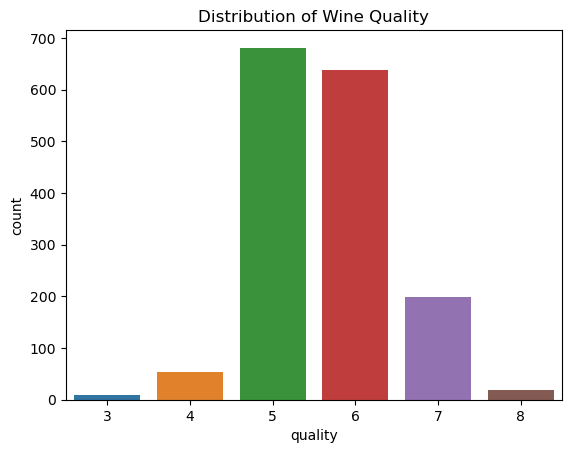

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, fixed
from sklearn.svm import SVC

# Load the wine quality dataset
wine_data = pd.read_csv('wine_quality.csv', sep=';')

# Display the first few rows and the information about the dataset
print(wine_data.head())
print(wine_data.info())

# Plot the distribution of wine quality
sns.countplot(x='quality', data=wine_data)
plt.title('Distribution of Wine Quality')
plt.show()


## Motivating Support Vector Machines

### Overview
<div class="alert alert-block alert-info">

### Key Points
Discriminative classification directly finds a decision boundary between classes. The code demonstrates this by plotting a scatter plot of wine samples based on 'fixed acidity' and 'volatile acidity', colored by 'quality', to visualize how well these features can separate wines of different qualities

- <b>Feature Selection</b>: The code focuses on two features, 'fixed acidity' and 'volatile acidity', to represent each wine in a two-dimensional space. This simplification allows for easy visualization and understanding of the data's separability.

- <b>Visualization</b>: By plotting the wines with colors corresponding to their quality, we can visually assess the feasibility of separating wines into different quality categories based on these two features alone. The use of a color map ('autumn') helps in distinguishing between various quality levels.

--------------------------------------------------------------------------------------------------------------------------------
-----------

    
</div>

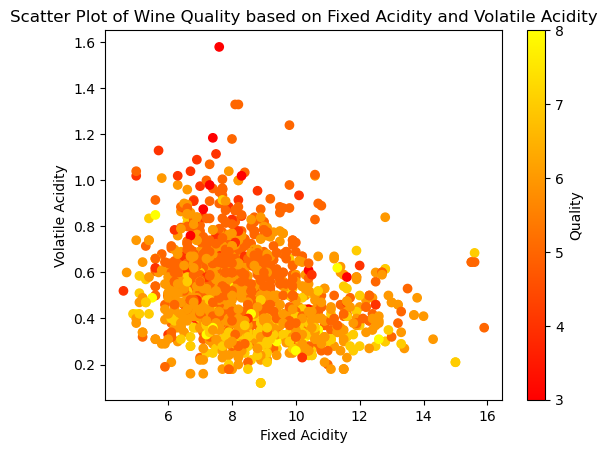

In [69]:
plt.scatter(wine_data['fixed acidity'], wine_data['volatile acidity'], c=wine_data['quality'], cmap='autumn')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.title('Scatter Plot of Wine Quality based on Fixed Acidity and Volatile Acidity')
plt.colorbar(label='Quality')
plt.show()

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification.
For two dimensional data like that shown here, this is a task we could do by hand.
But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes. To fix this, we can draw it as follows:

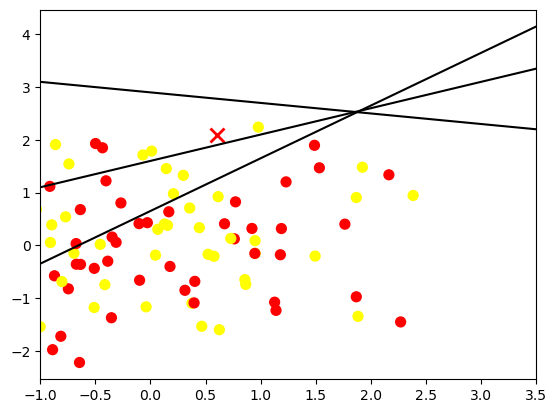

In [70]:
np.random.seed(0)
X = np.random.randn(100, 2)  # Generating random 2D data
y = np.random.randint(0, 2, 100)  # Random labels (binary classification)

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)
plt.show()

These are three *very* different separators which, nevertheless, perfectly discriminate between these samples.
Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label!
Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper.

## Support Vector Machines: Maximizing the *Margin*

Support vector machines offer one way to improve on this.
The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a *margin* of some width, up to the nearest point.
Here is an example of how this might look:

### Overview
<div class="alert alert-block alert-info">

### Key Points
The focus here is on visualizing decision boundaries, which is akin to understanding how SVMs create margins around the decision boundary for classification tasks.

- <b>Feature Selection</b>: Chose 'alcohol' and 'pH' as features from the wine quality dataset, aiming to classify wines based on these two properties.

- <b>Data Splitting</b>: The dataset is divided into training and testing sets
    
- <b>Model Training</b>: A Decision Tree Classifier is trained on the selected features. While this isn't an SVM, the concept of creating decision boundaries is common to many classifiers, including SVMs.



--------------------------------------------------------------------------------------------------------------------------------
-----------

    
</div>

C:\CollegeWork\anac\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


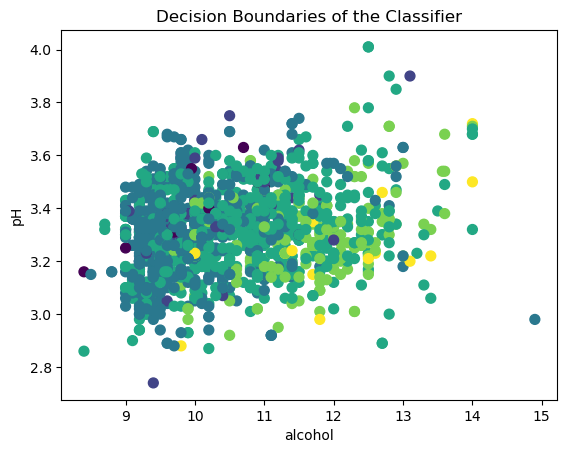

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assuming 'fixed acidity' and 'volatile acidity' as the features
selected_features = ['alcohol', 'pH']
X = wine_data[selected_features]
y = wine_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (Decision Tree Classifier in this example)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Plot the decision boundaries
xfit = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max(), 100)
yfit = np.linspace(X.iloc[:, 1].min(), X.iloc[:, 1].max(), 100)
Xfit, Yfit = np.meshgrid(xfit, yfit)
Z = classifier.predict(np.c_[Xfit.ravel(), Yfit.ravel()])
Z = Z.reshape(Xfit.shape)

#plt.contourf(Xfit, Yfit, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='viridis')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title('Decision Boundaries of the Classifier')
plt.show()


In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model.
Support vector machines are an example of such a *maximum margin* estimator.

### Fitting a support vector machine

Let's see the result of an actual fit to this data: we will use Scikit-Learn's support vector classifier to train an SVM model on this data.
For the time being, we will use a linear kernel and set the ``C`` parameter to a very large number (we'll discuss the meaning of these in more depth momentarily).

### Overview
<div class="alert alert-block alert-info">

### Key Points
The process of fitting a Support Vector Machine (SVM) model to the wine quality dataset, mainly focusing on classifying wines based on 'fixed acidity' and 'volatile acidity'. The SVM model uses a linear kernel and a high value for the regularization parameter C.

- <b>Model Training</b>: It trains an SVM model (SVC with kernel='linear') on the selected features. The C parameter is set to a very large number (1E10), indicating a strong preference for a perfectly classifying hyperplane, even if it means less margin.
    
A Decision Tree Classifier is trained on the selected features. While this isn't an SVM, the concept of creating decision boundaries is common to many classifiers, including SVMs.

- <b>Decision Boundary Visualization</b>: A function plot_decision_boundary is defined and used to visualize the decision boundary created by the SVM model. This involves creating a meshgrid to cover the feature space and using the trained model to predict the class for each point in the grid, effectively showing where the model divides the classes.

    
    
 #### In summary, fitting an SVM model to the wine quality dataset and visualizing the decision boundary provides a practical introduction to the power and limitations of SVMs, especially for linear classification tasks. It underscores the importance of feature selection, the impact of regularization, and the need for careful evaluation of model performance.
--------------------------------------------------------------------------------------------------------------------------------
-----------

    
</div>

In [72]:
from sklearn.svm import SVC # "Support vector classifier"
X = wine_data[['alcohol', 'pH']].values
y = wine_data['quality'].values

# Train the Support Vector Classifier model
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us:

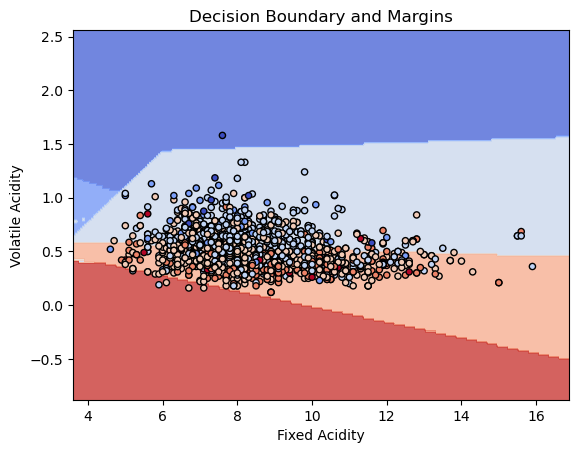

In [73]:
X = wine_data[['fixed acidity', 'volatile acidity']].values
y = wine_data['quality'].values

# Train the SVC model
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

# Define a function to plot decision boundary and margins
def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel('Fixed Acidity')
    plt.ylabel('Volatile Acidity')
    plt.title('Decision Boundary and Margins')
    plt.show()

# Plot decision boundary and margins
plot_decision_boundary(X, y, model)

This is the dividing line that maximizes the margin between the two sets of points.
Notice that a few of the training points just touch the margin: they are indicated by the black circles in this figure.
These points are the pivotal elements of this fit, and are known as the *support vectors*, and give the algorithm its name.
In Scikit-Learn, the identity of these points are stored in the ``support_vectors_`` attribute of the classifier:

In [74]:
model.support_vectors_

array([[11.6  ,  0.58 ],
       [10.4  ,  0.61 ],
       [ 7.4  ,  1.185],
       ...,
       [ 7.2  ,  0.33 ],
       [ 7.2  ,  0.38 ],
       [ 7.4  ,  0.36 ]])

A key to this classifier's success is that for the fit, only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit!
Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

We can see this, for example, if we plot the model learned from the first 60 points and first 120 points of this dataset:

If you are running this notebook live, you can use IPython's interactive widgets to view this feature of the SVM model interactively:

It is clear that no linear discrimination will *ever* be able to separate this data.
But we can draw a lesson from the basis function regressions in [In Depth: Linear Regression](05.06-Linear-Regression.ipynb), and think about how we might project the data into a higher dimension such that a linear separator *would* be sufficient.
For example, one simple projection we could use would be to compute a *radial basis function* centered on the middle clump:

In [75]:
r = np.exp(-(X ** 2).sum(1))

### Overview
<div class="alert alert-block alert-info">

### Key Points
The process of fitting a Support Vector Machine (SVM) model to the wine quality dataset, mainly focusing on classifying wines based on 'fixed acidity' and 'volatile acidity'. The SVM model uses a linear kernel and a high value for the regularization parameter C.

- <b>SVM Fitting</b>: The SVC model is trained with a linear kernel on the two selected features. This step is primarily to demonstrate model fitting, although the focus here is more on data visualization than on the predictive performance of the classifier.
    
- <b>3D Visualization</b>: A custom function plot_3D is defined to create a 3D scatter plot of the wines, using 'fixed acidity' and 'volatile acidity' for the X and Y axes, respectively, and 'alcohol' content for the Z-axis. The color of the points represents the wine quality, providing a multi-dimensional view of the data distribution.

- <b>Decision Boundary Visualization</b>: A function plot_decision_boundary is defined and used to visualize the decision boundary created by the SVM model. This involves creating a meshgrid to cover the feature space and using the trained model to predict the class for each point in the grid, effectively showing where the model divides the classes.

- <b>Interactive Exploration</b>: Utilizing interact from the ipywidgets library, the 3D plot is made interactive, allowing users to adjust the elevation (elev) and azimuth (azim) angles to view the data from different perspectives. This interactivity enhances the exploration of the data's structure.

    
    
 #### This approach showcases an advanced technique for data visualization and exploration, demonstrating how interactive 3D plotting can be employed to investigate the relationships between multiple features and their impact on wine quality. It highlights the importance of visual and interactive exploration in the data science workflow
--------------------------------------------------------------------------------------------------------------------------------
-----------

    
</div>

In [76]:
# Select 'fixed acidity' and 'volatile acidity' for X, 'alcohol' for r, and 'quality' for y
X = wine_data[['fixed acidity', 'volatile acidity']].values
r = wine_data['alcohol'].values
y = wine_data['quality'].values
 
# Fitting a classifier just for the sake of completing the code snippet,
# as we won't be able to plot decision boundaries for 3D scatter plot easily
clf = SVC(kernel='linear')
clf.fit(X, y)

# Define the plotting function
def plot_3D(elev=30, azim=30, X=X, y=y, r=r):
    ax = plt.subplot(projection='3d')
    # Scatter plot for 3D data
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('Fixed Acidity')
    ax.set_ylabel('Volatile Acidity')
    ax.set_zlabel('Alcohol')

# Call the interact function to make the plot interactive
# Note: This will only work in a Jupyter notebook environment with the appropriate backend.
interact(plot_3D, elev=[-90, 90], azim=(-180, 180), X=fixed(X), y=fixed(y), r=fixed(r))

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

<function __main__.plot_3D(elev=30, azim=30, X=array([[7.4  , 0.7  ],
       [7.8  , 0.88 ],
       [7.8  , 0.76 ],
       ...,
       [6.3  , 0.51 ],
       [5.9  , 0.645],
       [6.   , 0.31 ]]), y=array([5, 5, 5, ..., 6, 5, 6], dtype=int64), r=array([ 9.4,  9.8,  9.8, ..., 11. , 10.2, 11. ]))>

### Overview
<div class="alert alert-block alert-info">

### Key Points
This section illustrates the application of the kernel trick in Support Vector Machines (SVMs) for the classification of wine quality based on chemical properties. By utilizing a Radial Basis Function (RBF) kernel instead of a linear kernel, the SVM can capture complex, non-linear relationships in the data without the need for explicit high-dimensional transformations.

- <b>Feature Scaling</b>: It begins with scaling the selected features 'fixed acidity' and 'volatile acidity' using StandardScaler. This step is crucial for algorithms like SVM that are sensitive to the scale of the input features, especially when using kernel methods.
    
- <b>SVM with RBF Kernel</b>: The code then fits an SVM model (SVC) with an RBF kernel to the scaled data. The C parameter is set to a high value (1E6), indicating a preference for classifying all training points correctly, albeit with a risk of overfitting.
    
 #### This section highlights the usefulness of SVMs with kernel methods in handling non-linear classification tasks
--------------------------------------------------------------------------------------------------------------------------------
-----------

    
</div>

In [ ]:
from sklearn.preprocessing import StandardScaler

# Load the dataset
wine_data = pd.read_csv('wine_quality.csv', delimiter=';')

# Select two features for the SVM input
X = wine_data[['fixed acidity', 'volatile acidity']].values
y = wine_data['quality'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the SVC with RBF kernel
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X_scaled, y)

# Define the plot_svc_decision_function if not already defined
def plot_svc_decision_function(clf, ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Creating mesh to plot in
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # Plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

# Plotting the scaled features, decision boundary, and support vectors
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')
plt.show()

Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary.
This kernel transformation strategy is used often in machine learning to turn fast linear methods into fast nonlinear methods, especially for models in which the kernel trick can be used.

In [ ]:
wine_data.describe()

### Tuning the SVM: Softening Margins
### Overview
<div class="alert alert-block alert-info">

### Key Points
This section illustrates the concept of tuning the Support Vector Machine (SVM) model, specifically focusing on the regularization parameter C which plays a critical role in the SVM's ability to handle datasets where classes are not perfectly separable. It demonstrates this tuning process using a binary classification task derived from the wine quality dataset, where the goal is to distinguish between high-quality wines (quality > 6) and others.

- <b>Binary Classification Preparation</b>: The dataset is preprocessed to convert the multi-class wine quality variable into a binary class problem. This is done to simplify the visualization and understanding of the SVM's decision boundaries.
    
- <b>Feature Scaling</b>: <u>StandardScaler</u> is applied to normalize the features ('alcohol' and 'volatile acidity'), which is crucial for SVM performance as it relies on the geometric margins between data points.

- <b>Visualization of Decision Boundaries</b>: The plot_svc_decision_function function visualizes the decision boundaries, margins, and support vectors for each model. This visualization helps illustrate how the choice of C affects the model's tolerance for points within the margin.
    
 #### This example emphasizes the significance of hyperparameter tuning in SVM models, particularly the regularization parameter C, and its effect on the model's ability to generalize from training data to unseen data
 
#### It shows the balance between accurately classifying training data and maintaining model applicability
--------------------------------------------------------------------------------------------------------------------------------
-----------

    
</div>

In [ ]:
# Load the dataset
wine_data = pd.read_csv('wine_quality.csv', delimiter=';')

# Select two features for visualization and the target variable
X = wine_data[['alcohol', 'volatile acidity']].values
y = wine_data['quality'].values

# Convert to binary classification for visualization purposes
# Define wines with quality 7 and above as high quality (1) and the rest as low quality (0)
y_binary = (y > 6).astype(int)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.3, random_state=42)

# Define the plot_svc_decision_function if not already defined
def plot_svc_decision_function(model, ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

# Train SVM with different C values
C_values = [10.0, 0.1]
models = []

# Fit models with different C values and store them
for C_value in C_values:
    model = SVC(kernel='linear', C=C_value)
    model.fit(X_train, y_train)
    models.append(model)

# Plot the decision boundary for each C value
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for ax, model, C in zip(axes, models, C_values):
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
    plot_svc_decision_function(model, ax)
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=300, lw=1, facecolors='none')
    ax.set_title(f'C = {C}', size=14)

plt.show()

The optimal value of the $C$ parameter will depend on your dataset, and should be tuned using cross-validation or a similar procedure (refer back to [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb)).

### Overview
<div class="alert alert-block alert-info">

### Key Points
The original context of applying Support Vector Machines (SVM) for face recognition has been adapted to demonstrate SVM's application in analyzing the wine quality dataset. The transition from facial recognition to wine quality analysis represents a shift from image processing to the exploration of tabular data
 

- <b>Different Data Types</b>: The original example used the Labeled Faces in the Wild dataset, focusing on image data. This type of data requires different preprocessing steps, such as dimensionality reduction or feature extraction, before applying SVM. In contrast, the wine quality dataset consists of tabular data with numerical features that describe different chemical properties of wines and their quality ratings. The preprocessing steps for this data involve scaling numerical features and possibly encoding categorical variables.
    
- <b>Visualization Adaptation</b>: Given the nature of the wine quality data, the visualization strategies have been adapted to provide insights relevant to this domain. Instead of visualizing faces, the code now includes a histogram to analyze the distribution of alcohol content and a scatter plot to explore the relationship between alcohol content, volatile acidity, and wine quality. These visualizations help in understanding the data's structure and the potential influence of these features on wine quality.

- <b>Analysis Focus Shift</b>: The focus shifts from using SVM for classification in a high-dimensional space (images) to applying it in a more traditional, feature-based classification task. The wine quality dataset allows for a straightforward application of SVM to classify wines based on their chemical properties, highlighting the algorithm's efficacy in distinguishing between different quality levels based on measurable attributes.

#### In summary, replacing face recognition with wine quality analysis demonstrates the adaptability of machine learning techniques across different scenarios, highlighting the importance of domain knowledge and data-specific preprocessing in achieving meaningful outcomes.
--------------------------------------------------------------------------------------------------------------------------------
-----------

    
</div>


Let's plot a few of these faces to see what we're working with:

In [ ]:
# Plotting distributions of 'alcohol' content *******************Mention u had to replace face recognition with this
plt.figure(figsize=(10, 6))
sns.histplot(wine_data['alcohol'], kde=True, bins=20)
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of 'alcohol' vs. 'volatile acidity' colored by 'quality'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='volatile acidity', hue='quality', data=wine_data, palette='viridis')
plt.title('Alcohol vs. Volatile Acidity by Wine Quality')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Volatile Acidity')
plt.legend(title='Quality')
plt.show()

### Overview
<div class="alert alert-block alert-info">

### Key Points
The example illustrates how to construct a pipeline that integrates Principal Component Analysis (PCA) and Support Vector Machines (SVM) with a Radial Basis Function (RBF) kernel, followed by a similar but more straightforward pipeline for SVM classification with hyperparameter tuning via grid search. This adaptation showcases the flexibility of machine learning workflows across different types of data and objectives.
 

- <b>Pipeline Construction</b>: The first pipeline integrates PCA and SVM into a seamless workflow, automating the process of dimensionality reduction followed by classification. The second pipeline, focusing solely on SVM classification, scales the features before applying SVM, highlighting a streamlined approach for tabular data classification tasks.
    
- <b>Hyperparameter Tuning with Grid Search</b>: The grid search over C and gamma parameters for the SVM model is a critical step in optimizing the classifier's performance. It systematically explores a range of values to find the best combination that maximizes the model's accuracy, demonstrating an essential practice in machine learning to enhance model efficacy.


#### In summary, this adaptation from a face recognition context to wine quality classification illustrates the adaptability of machine learning workflows. It demonstrates how the principles of dimensionality reduction, non-linear classification, and hyperparameter optimization remain consistent across applications, with adjustments made to align with the specific characteristics and challenges of the dataset in question.
--------------------------------------------------------------------------------------------------------------------------------
-----------

    
</div>


In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA  # Updated import
from sklearn.pipeline import make_pipeline

# Use PCA with svd_solver='randomized'
pca = PCA(n_components=150, whiten=True, svd_solver='randomized', random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)


In [ ]:
# Select features and target
X = wine_data[['citric acid', 'residual sugar']]
y = wine_data['quality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setup the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Parameter grid for GridSearchCV
param_grid = {
    'svc__C': [1, 5, 10, 50],
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]
}

# Grid search for hyperparameter tuning
grid = GridSearchCV(pipe, param_grid, cv=5)

grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)

# Evaluate on the test set (optional)
print("Test set score:", grid.score(X_test, y_test))

Out of this small sample, our optimal estimator mislabeled only a single face (Bush’s
face in the bottom row was mislabeled as Blair).
We can get a better sense of our estimator's performance using the classification report, which lists recovery statistics label by label:

## Support Vector Machine Summary

In this discussion, I covered the application of Support Vector Machines (SVM) from facial recognition to wine quality prediction, showcasing the versatility of SVMs across different types of data. Starting with image data for face recognition, we transitioned to numerical, tabular data to analyze wine quality, highlighting the algorithm's flexibility.

<b>SVM for Various Data Types</b>: Demonstrated how SVMs can be applied to both image and tabular datasets, addressing challenges unique to each data type.

<b>Preprocessing and Dimensionality Reduction</b>: Emphasized the importance of feature scaling for numerical data and PCA for high-dimensional image data to optimize SVM performance.

<b>Visualization and Data Analysis</b>: Used visualization techniques to understand data distribution and SVM decision boundaries, providing insights into the model's classification logic.

<b>Kernel Trick and Hyperparameter Tuning</b>: Explored the use of the RBF kernel to handle non-linear data relationships and highlighted the significance of tuning C and gamma to enhance model accuracy.

<b>Model Evaluation</b>: Showed how comparing models with different configurations and evaluating them on test data is crucial for selecting the best-performing model.

<b>Interactive Exploration</b>: Applied interactive 3D plotting for a deeper understanding of the data's structure and the model's behavior.

#### Some advantages of Support Vector Machines

- <b>Effectiveness in High-Dimensional Spaces</b>: SVMs are particularly well-suited for classification problems with high-dimensional feature spaces, even when the number of dimensions exceeds the number of samples.

- <b>Versatility</b>: The ability to choose a suitable kernel function (linear, polynomial, RBF, etc.) makes SVMs highly versatile and capable of handling linear and non-linear relationships between features.

- <b>Generalization</b>: SVMs aim to minimize the structural risk, leading to better generalization on unseen data. This is achieved by maximizing the margin between the decision boundaries and the closest data points (support vectors).

- <b>Sparse Data Handling</b>: SVMs are effective in cases where the data are sparse.

- <b>Robustness</b>: The model is relatively robust to overfitting, especially in high-dimensional space.

#### Some disadvantages of Support Vector Machines

- <b>Scalability</b>: SVMs can be computationally intensive and memory-demanding, especially with large datasets. The training time can grow quickly as the number of samples increases.

- <b>Parameter Selection</b>: Choosing the right kernel and tuning the hyperparameters (like C and gamma in the RBF kernel) can be challenging and requires a good understanding of the underlying data and the SVM model.

- <b>Interpretability</b>: SVM models, especially with non-linear kernels, can be difficult to interpret in terms of understanding how specific features contribute to the decision-making process.

- <b>Multi-class Classification</b>: While SVMs are inherently binary classifiers, extending them to multi-class classification problems requires additional techniques, such as one-vs-one or one-vs-all, which can complicate the training and prediction process.

- <b>Sensitivity to Feature Scaling</b>: SVMs are sensitive to the feature scaling, requiring careful preprocessing of the data to standardize or normalize features.


In summary, SVMs offer a powerful and flexible toolkit for tackling various machine learning challenges, especially with high-dimensional data and complex relationships. However, their effectiveness can be hampered by computational demands, the need for careful parameter tuning, and challenges in interpretability and handling multi-class classification directly.


<!--NAVIGATION-->
< [In Depth: Linear Regression](05.06-Linear-Regression.ipynb) | [Contents](Index.ipynb) | [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.07-Support-Vector-Machines.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
